In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
df = pd.read_csv('data7pad.csv', sep = ';')

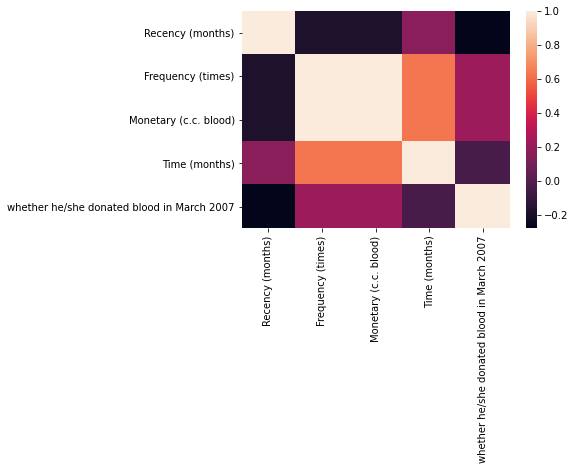

In [4]:
sns.heatmap(df.corr())

In [5]:
df.corr() #see correlations between variables

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


In [6]:
df['f/t']=df['Frequency (times)']/df['Time (months)'] 

In [7]:
df['f/t'].value_counts()

0.500000    53
0.250000    50
0.142857    25
0.062500    19
0.090909    19
            ..
0.106383     1
0.098039     1
0.139241     1
0.197674     1
0.444444     1
Name: f/t, Length: 262, dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
for i in ['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)','f/t','whether he/she donated blood in March 2007']:
    df[i] = (df[i]- min(df[i]))/(max(df[i])-min(df[i]))

In [10]:
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007,f/t
0,0.027027,1.000000,1.000000,1.000000,1.0,0.503495
1,0.000000,0.244898,0.244898,0.270833,1.0,0.456947
2,0.013514,0.306122,0.306122,0.343750,1.0,0.449706
3,0.027027,0.387755,0.387755,0.447917,1.0,0.436834
4,0.013514,0.469388,0.469388,0.781250,0.0,0.302259
...,...,...,...,...,...,...
743,0.310811,0.020408,0.020408,0.375000,0.0,0.039654
744,0.283784,0.020408,0.020408,0.520833,0.0,0.025290
745,0.310811,0.040816,0.040816,0.625000,0.0,0.035351
746,0.527027,0.000000,0.000000,0.385417,0.0,0.012294


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B2F116D90>,
      dtype=object)

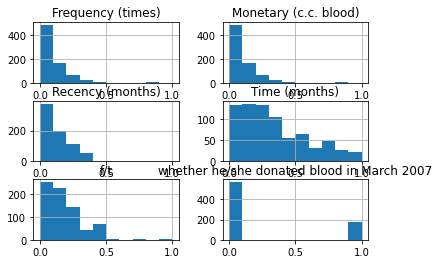

In [11]:
df.hist()

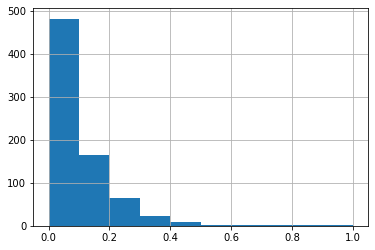

In [12]:
df['Frequency (times)'].hist()

In [13]:
data1=df[df['Frequency (times)']<=0.3]

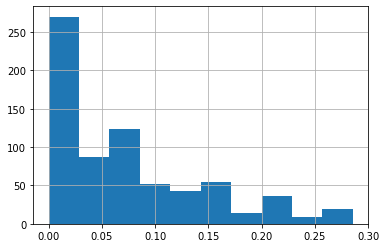

In [14]:
data1['Frequency (times)'].hist()

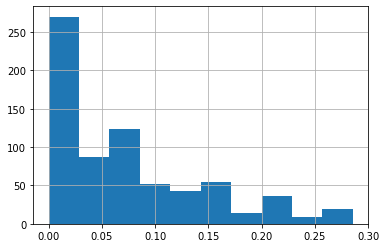

In [15]:
data1['Monetary (c.c. blood)'].hist()

In [16]:
df['Recency (months)'].value_counts()

0.027027    173
0.054054    156
0.148649     84
0.189189     76
0.216216     63
0.310811     50
0.283784     44
0.121622     20
0.040541     13
0.013514      9
0.094595      8
0.108108      6
0.162162      6
0.067568      6
0.175676      5
0.081081      5
0.000000      5
0.135135      3
0.513514      2
0.243243      2
0.202703      2
0.229730      1
0.351351      1
0.270270      1
0.297297      1
0.972973      1
0.337838      1
0.472973      1
0.540541      1
0.527027      1
1.000000      1
Name: Recency (months), dtype: int64

In [17]:
data=data1[data1['Recency (months)']<=0.4]

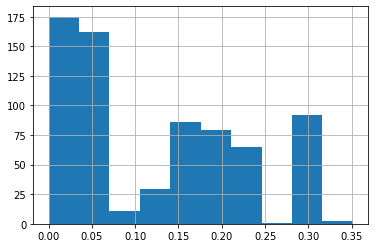

In [18]:
data['Recency (months)'].hist()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Recency (months)                            748 non-null    float64
 1   Frequency (times)                           748 non-null    float64
 2   Monetary (c.c. blood)                       748 non-null    float64
 3   Time (months)                               748 non-null    float64
 4   whether he/she donated blood in March 2007  748 non-null    float64
 5   f/t                                         748 non-null    float64
dtypes: float64(6)
memory usage: 35.2 KB


In [20]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
f/t                                           0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[['Recency (months)','Frequency (times)','Time (months)','f/t']], df[['whether he/she donated blood in March 2007']], random_state=0, test_size = 0.3)

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
X_train

,Recency (months),Frequency (times),Time (months),f/t
242,0.054054,0.040816,0.239583,0.107945
533,0.027027,0.061224,0.125000,0.275930
315,0.054054,0.020408,0.281250,0.056212
12,0.027027,0.183673,0.270833,0.348337
161,0.027027,0.000000,0.000000,0.493151
...,...,...,...,...
707,0.148649,0.061224,0.750000,0.041096
192,0.027027,0.061224,0.343750,0.102153
629,0.094595,0.204082,0.906250,0.111590
559,0.040541,0.142857,0.500000,0.148493


In [24]:
y_train

,whether he/she donated blood in March 2007
242,1.0
533,0.0
315,0.0
12,1.0
161,0.0
...,...
707,0.0
192,0.0
629,0.0
559,0.0


In [25]:
for i in range(10,101,10):
    for j in range(1,11):
        for k in ['adam','lbfgs','sgd']:
            mlp = MLPClassifier(hidden_layer_sizes=(i),solver=k, learning_rate_init= j/100, max_iter=2000, activation = "logistic", alpha = 0.0001, momentum = 0.9)
            mlp.fit(X_train, y_train)
            print('Hidden layer ',i)
            print('learning rate ',j/100)
            print('solver ',k)
            mlp.score(X_test,y_test)
            print(mlp.score(X_test,y_test))
            print()

Hidden layer  10
learning rate  0.01
solver  adam
0.7377777777777778

Hidden layer  10
learning rate  0.01
solver  lbfgs
0.7911111111111111

Hidden layer  10
learning rate  0.01
solver  sgd
0.7288888888888889

Hidden layer  10
learning rate  0.02
solver  adam
0.7866666666666666

Hidden layer  10
learning rate  0.02
solver  lbfgs
0.7511111111111111

Hidden layer  10
learning rate  0.02
solver  sgd
0.7288888888888889

Hidden layer  10
learning rate  0.03
solver  adam
0.7911111111111111

Hidden layer  10
learning rate  0.03
solver  lbfgs
0.7688888888888888

Hidden layer  10
learning rate  0.03
solver  sgd
0.7288888888888889

Hidden layer  10
learning rate  0.04
solver  adam
0.7955555555555556

Hidden layer  10
learning rate  0.04
solver  lbfgs
0.7644444444444445

Hidden layer  10
learning rate  0.04
solver  sgd
0.7377777777777778

Hidden layer  10
learning rate  0.05
solver  adam
0.7955555555555556

Hidden layer  10
learning rate  0.05
solver  lbfgs
0.7733333333333333

Hidden layer  10
le

Hidden layer  40
learning rate  0.1
solver  lbfgs
0.7111111111111111

Hidden layer  40
learning rate  0.1
solver  sgd
0.7288888888888889

Hidden layer  50
learning rate  0.01
solver  adam
0.7333333333333333

Hidden layer  50
learning rate  0.01
solver  lbfgs
0.7022222222222222

Hidden layer  50
learning rate  0.01
solver  sgd
0.7288888888888889

Hidden layer  50
learning rate  0.02
solver  adam
0.7333333333333333

Hidden layer  50
learning rate  0.02
solver  lbfgs
0.7111111111111111

Hidden layer  50
learning rate  0.02
solver  sgd
0.7288888888888889

Hidden layer  50
learning rate  0.03
solver  adam
0.7333333333333333

Hidden layer  50
learning rate  0.03
solver  lbfgs
0.7022222222222222

Hidden layer  50
learning rate  0.03
solver  sgd
0.7422222222222222

Hidden layer  50
learning rate  0.04
solver  adam
0.7422222222222222

Hidden layer  50
learning rate  0.04
solver  lbfgs
0.7022222222222222

Hidden layer  50
learning rate  0.04
solver  sgd
0.7333333333333333

Hidden layer  50
learn

Hidden layer  80
learning rate  0.09
solver  sgd
0.7333333333333333

Hidden layer  80
learning rate  0.1
solver  adam
0.7333333333333333

Hidden layer  80
learning rate  0.1
solver  lbfgs
0.6711111111111111

Hidden layer  80
learning rate  0.1
solver  sgd
0.7333333333333333

Hidden layer  90
learning rate  0.01
solver  adam
0.7422222222222222

Hidden layer  90
learning rate  0.01
solver  lbfgs
0.7244444444444444

Hidden layer  90
learning rate  0.01
solver  sgd
0.7288888888888889

Hidden layer  90
learning rate  0.02
solver  adam
0.7422222222222222

Hidden layer  90
learning rate  0.02
solver  lbfgs
0.6844444444444444

Hidden layer  90
learning rate  0.02
solver  sgd
0.7288888888888889

Hidden layer  90
learning rate  0.03
solver  adam
0.7422222222222222

Hidden layer  90
learning rate  0.03
solver  lbfgs
0.7422222222222222

Hidden layer  90
learning rate  0.03
solver  sgd
0.7333333333333333

Hidden layer  90
learning rate  0.04
solver  adam
0.7333333333333333

Hidden layer  90
learnin

In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(10,),solver='adam', learning_rate_init= 0.03, max_iter=2000, activation = "logistic", alpha = 0.0001, momentum = 0.9) #stochastic gradient design = untuk nemuin loss yang paling rendah. logistic = sigmoid

In [27]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,),
              learning_rate_init=0.03, max_iter=2000)

In [28]:
mlp.score(X_test,y_test)

0.7866666666666666